In [142]:
import numpy as np
from matplotlib import pyplot as plt
import os

import ants # Advanced Neuroimagins ToolS

In [2]:
pwd

'/mmfs1/data/aglinska/BC-ORG-Data/Code'

In [60]:
indir = '../../data/ABIDE2/Outputs/denoise/denoise/'
subs = [sub for sub in os.listdir(indir) if sub.startswith('sub-') and os.path.isdir(os.path.join(indir,sub))]
subs.sort()

print(len(subs))
subs[0:10]

1081


['sub-28676',
 'sub-28677',
 'sub-28678',
 'sub-28679',
 'sub-28680',
 'sub-28681',
 'sub-28682',
 'sub-28683',
 'sub-28684',
 'sub-28685']

In [320]:
anat_fn = '../../data/ABIDE2/Outputs/denoise/denoise/sub-51274/ses-1/anat/sub-51274_ses-1_acq-hires_run-1_T1w_denoised.nii.gz'
#T1 = ants.image_read(anat_fn)

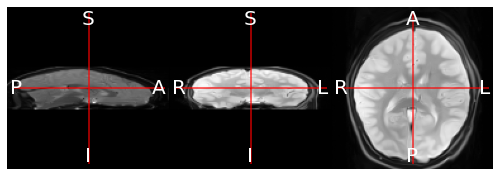

In [313]:
T1.plot_ortho(flat=True)

In [82]:
anat_fn = '../../data/ABIDE2/Outputs/denoise/denoise/sub-29660/ses-1/anat/sub-29660_ses-1_run-1_T1w_denoised.nii.gz'
T1 = ants.image_read(anat_fn)
T1

ANTsImage (RPI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (256, 182, 256)
	 Spacing    : (0.9766, 1.2, 0.9766)
	 Origin     : (-127.6147, 101.357, -92.0899)
	 Direction  : [ 1.  0.  0.  0. -1.  0.  0.  0.  1.]

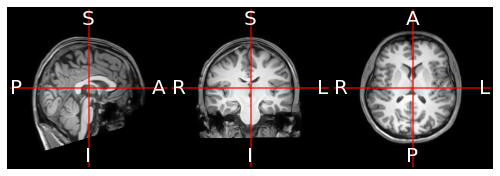

In [86]:
T1.plot_ortho(flat=True)

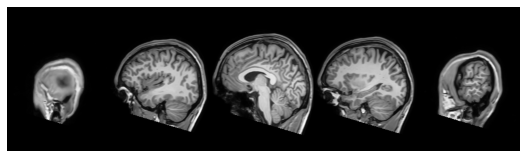

In [91]:
T1.plot(nslices=5,axis=0,figsize=2)

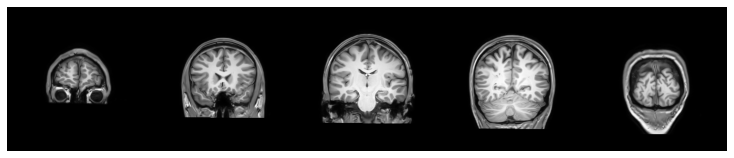

In [93]:
T1.plot(nslices=5,axis=1,figsize=2)

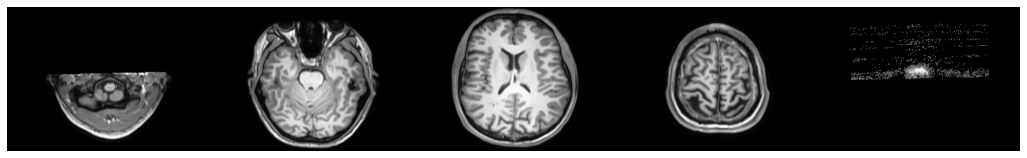

In [94]:
T1.plot(nslices=5,axis=2,figsize=2)

In [97]:
T1.numpy().shape

(256, 182, 256)

In [310]:
T1.numpy()[128,128,128]

435.8748

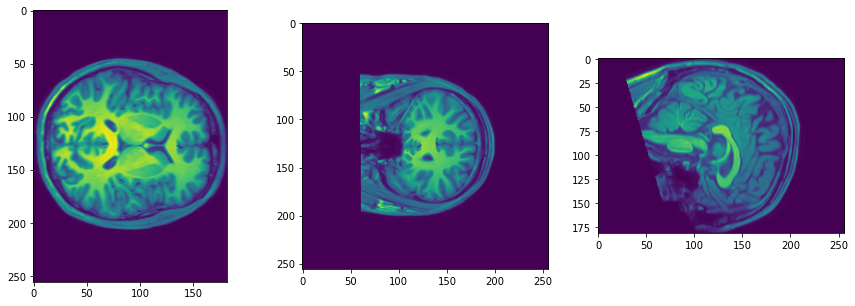

In [103]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1);plt.imshow(T1.numpy()[:,:,128])
plt.subplot(1,3,2);plt.imshow(T1.numpy()[:,128,:])
plt.subplot(1,3,3);plt.imshow(T1.numpy()[128,:,:])

In [106]:
T1.numpy().flatten().shape

(11927552,)

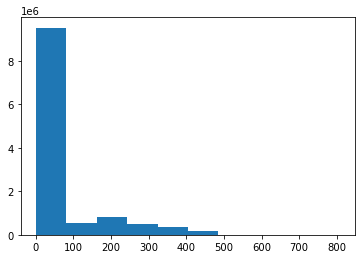

In [112]:
plt.hist(T1.numpy().flatten());

In [166]:
func_fn = '../../data/ABIDE2/Outputs/denoise/denoise/sub-29660/ses-1/func/sub-29660_ses-1_task-rest_run-1_bold_denoised.nii.gz'
epi_4D = ants.image_read(func_fn)
epi_4D

ANTsImage
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (128, 128, 45, 162)
	 Spacing    : (1.5625, 1.5629, 3.1, 1.0)
	 Origin     : (-99.2885, 75.3787, -8.7707, 0.0)
	 Direction  : [ 1.  0.  0.  0.  0. -1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.]

In [167]:
epi_3D = ants.slice_image(epi_4D,axis=3,idx=0)

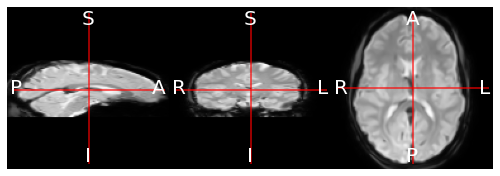

In [168]:
epi_3D.plot_ortho(flat=True)

In [169]:
epi_3D = epi_3D.resample_image(resample_params=(64,64,64), use_voxels=True, interp_type=4)

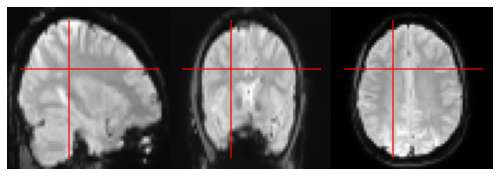

In [170]:
epi_3D.plot_ortho(flat=True,xyz=[40,40,40],orient_labels=False)

In [171]:
epi_4D = epi_4D.resample_image(resample_params=(64,64,64,epi_4D.shape[-1]), use_voxels=True, interp_type=4)

In [172]:
epi_4D

ANTsImage
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (64, 64, 64, 162)
	 Spacing    : (3.1498, 3.1505, 2.1651, 1.0)
	 Origin     : (-99.2885, 75.3787, -8.7707, 0.0)
	 Direction  : [ 1.  0.  0.  0.  0. -1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.]

(array([2.6771529e+07, 3.1034950e+06, 1.2917750e+06, 5.1201930e+06,
        5.3344720e+06, 7.2524500e+05, 1.1573500e+05, 4.6770000e+03,
        1.5800000e+02, 4.9000000e+01]),
 array([-135.0395 ,  170.47739,  475.99426,  781.51117, 1087.0281 ,
        1392.5449 , 1698.0619 , 2003.5787 , 2309.0957 , 2614.6125 ,
        2920.1294 ], dtype=float32),
 <BarContainer object of 10 artists>)

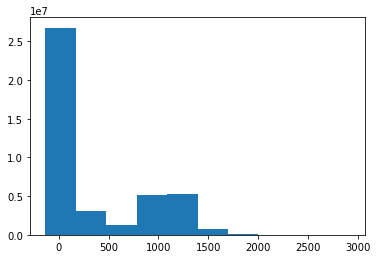

In [173]:
plt.hist(epi_4D.numpy().flatten())

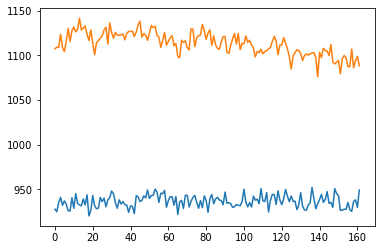

In [183]:
plt.plot(epi_4D.numpy()[40,40,40,:]);
plt.plot(epi_4D.numpy()[40,40,45,:]);

In [184]:
# Z-score, i.e. subtract the mean and divise by st dev
im = (epi_4D - epi_4D.mean(axis=3)[:,:,:,np.newaxis]) / epi_4D.std(axis=3)[:,:,:,np.newaxis]

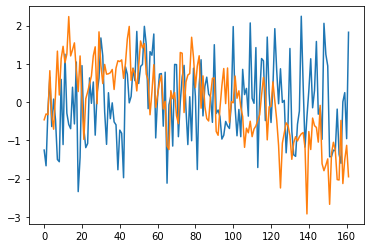

In [185]:
plt.plot(im.numpy()[40,40,40,:]);
plt.plot(im.numpy()[40,40,45,:]);

In [188]:
roi_timecourse = epi_4D.numpy()[40,40,40,:]

In [298]:
roi_timecourse = epi_4D.numpy()[35:45,35:45,35:45,:]
roi_timecourse = roi_timecourse.mean(axis=0).mean(axis=0).mean(axis=0)

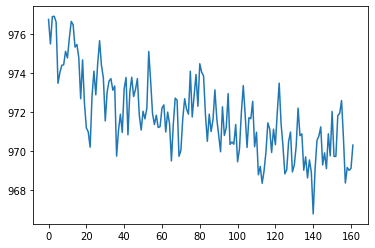

In [311]:
plt.plot(roi_timecourse)

In [195]:
from tqdm import tqdm

In [300]:
# for i in tqdm(range(64)):
#     for j in range(64):
#         for k in range(64):
#             this_vec = epi_4D.numpy()[i,j,k,:]
#             c = np.corrcoef(roi_timecourse,this_vec)[0,1]
#             corr_map[i,j,k] = c

In [301]:
corr_map = np.zeros((64,64,64))
vec1 = epi_4D.numpy().reshape(-1,epi_4D.shape[-1])
vec2 = roi_timecourse[np.newaxis,:]

print(vec1.shape)
print(vec2.shape)

(262144, 162)
(1, 162)


In [302]:
cmap = np.array([np.corrcoef(vec1[i,:],vec2,rowvar=False)[0,1] for i in tqdm(range(vec1.shape[0]))])

100%|██████████| 262144/262144 [00:21<00:00, 11997.41it/s]


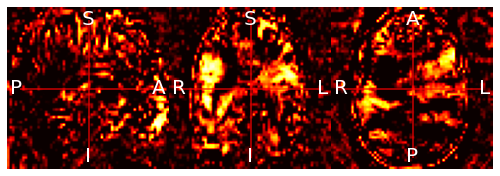

In [307]:
im_cmap = epi_3D.new_image_like(cmap.reshape(64,64,64))
im_cmap_tresh = im_cmap.copy()

im_cmap_tresh[im_cmap_tresh < 0] = 0

im_cmap_tresh.plot_ortho(flat=True,cmap='hot')